# Interpretando los Resultados de la Caja Negra

Una vez que hemos entrenado una caja negra para hacer predicciones podemos querer saber mas a cerca de como esta caja negra toma esas decisiones aun sin entender completamente que es lo que sucede dentro de ella. Para ello veremos varias tecnicas que nos pueden ayudar a interpretar los resultados.

## Tecnicas de Caja Negra

Estas tecnicas sirven para interpretar los resultados aun sin entender absolutamente nada de lo que pasa adentro de las cajas negras ni cual fue el algoritmo utilizado para entrenarlas.

Existen varias tecnicas y librerias para hacer esto, a continuacion se mencionan algunas:
  - [Sklearn Inspection](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.inspection)
  - [Shap](https://shap.readthedocs.io/en/latest/index.html)
  - [ELI5](https://eli5.readthedocs.io/en/latest/)
  - [imodels](https://github.com/csinva/imodels)
  
En esta unidad veremos la tecnica mas sencilla llamada Feature Permutation y que consiste en seleccionar una columna especifica de mi dataset, mezclar sus filas y calcular el error del modelo. Si esta mezcla de las filas ha modificado mucho su poder de prediccion entonces quiere decir que esa columna es importante, si de lo contrario no ha modificado su poder de prediccion quiere decir que esa columna no ha aportado mucho a la prediccion. De esta manera podemos saber cuales han sido las columnas que el modelo ha considerado mas importantes a la hora de hacer la prediccion.

Veamos ahora un ejemplo con el modelo complejo que hemos obtenido en la unidad anterior:

In [ ]:
!pip install "flaml[automl]"

In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [3]:
df_train = pd.read_csv('https://raw.githubusercontent.com/amiune/freecodingtour/main/cursos/espanol/datascience/data/diabetes/diabetes_train_procesado.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/amiune/freecodingtour/main/cursos/espanol/datascience/data/diabetes/diabetes_test_procesado.csv')

In [4]:
X_train = df_train.loc[:, df_train.columns != "diabetes"]
y_train = df_train.loc[:, "diabetes"]

In [20]:
from flaml import AutoML
automl = AutoML()
automl.fit(X_train, y_train, task="classification", time_budget=1, verbose=0)

In [6]:
automl.best_estimator

'lgbm'

In [ ]:
!pip install eli5

In [8]:
X_test = df_test.loc[:, df_test.columns != "diabetes"]
y_test = df_test.loc[:, "diabetes"]

## Permutation Importance

In [9]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(automl, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.0873 ± 0.0039,gimnasia
0.0786 ± 0.0023,glucosa_baja
0.0719 ± 0.0035,peso
0.0700 ± 0.0017,edad
0.0641 ± 0.0046,presion2
0.0510 ± 0.0022,sexo_f
0.0296 ± 0.0025,colesterol_bajo
0.0264 ± 0.0014,glucosa_alta
0.0208 ± 0.0028,sexo_m
0.0131 ± 0.0010,colesterol_alto


Aqui vemos la lista de las columnas ordenadas por orden de importancia de mayor (verde) a menor (rojo)

## Shap Values

Ahora veremos como utilizar la libreria Shap para analizar como ha influido cada columna en la prediccion de un dato en particular

In [10]:
!pip install shap -U -q

In [11]:
import shap

Creamos una funcion que reciba como parametro un datos x y que utilizando nuestra caja negra entrenada nos devuelva solo la probabilidad de que sea positivo el dato x

In [12]:
def prob_positiva(x):
    probabilidades  = automl.predict_proba(x)
    probabilidad_positiva = probabilidades[:, 1]
    return probabilidad_positiva

Obtenemos la mediana de cada columna

In [13]:
X_train.median()

fuma                0.000000
alcohol             0.000000
gimnasia            1.000000
edad                0.116675
altura              0.079476
peso               -0.152197
presion1           -0.054742
presion2           -0.086953
colesterol_alto     0.000000
colesterol_bajo     1.000000
colesterol_medio    0.000000
glucosa_alta        0.000000
glucosa_baja        1.000000
glucosa_media       0.000000
sexo_f              0.000000
sexo_m              1.000000
dtype: float64

In [14]:
med = X_train.median().values.reshape((1, X_train.shape[1]))
med

array([[ 0.        ,  0.        ,  1.        ,  0.1166749 ,  0.07947594,
        -0.15219657, -0.05474158, -0.08695264,  0.        ,  1.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         1.        ]])

Calculamos los shap values del dato que queremos analizar

In [15]:
explainer = shap.Explainer(prob_positiva, med)
shap_values = explainer(X_test.iloc[0:1, :]) 

Graficamos los shap values para ver la incidencia de cada variable en la prediccion

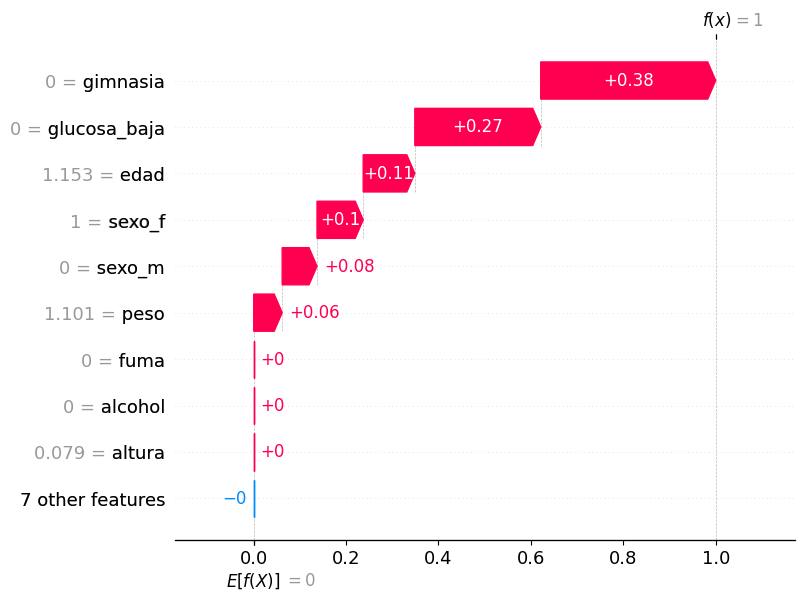

In [16]:
shap.plots.waterfall(shap_values[0])

Aqui vemos que las variables que mas han influido en la prediccion son el nivel de glucosa y si hace gimnasia. Esto coincide con lo analizado con el metodo anterior de 

## Tecnicas de Analisis de Modelos Simples

Cuando elegimos modelos simples como:
- [Regresion Lineal](https://colab.research.google.com/github/amiune/freecodingtour/blob/main/cursos/espanol/datascience/E3_regresion_lineal.ipynb)
- [Arbol de Decision](https://colab.research.google.com/github/amiune/freecodingtour/blob/main/cursos/espanol/datascience/E2_arbol.ipynb)

Entonces es mucho mas simple entender que es lo que esta haciendo el modelo ya que estos algoritmos son simples de entender. Para ver mas en detalle como funcionan ir a la seccion de material avanzado "Espiando adentro de las cajas negras"

# Referencias: 

- [What Are Shapley Interactions, and Why Should You Care?](https://mindfulmodeler.substack.com/p/what-are-shapley-interactions-and)

# Fin: [Volver al contenido del curso](https://www.freecodingtour.com/cursos/espanol/datascience/datascience.html)